# Regressions

Regressions in contrast to classification methods allow the prediction of a point estimate and not only the prediction of a category. Going back to the eyesight example, one would not predict if an individual needs glasses or not but rather the thickness of the glasses. 

Here we will work with a datset that was part of a recent publication.

![alt text](./images/nhb_ds.jpg "Title")

In the dataset includes data from German-native and -non-native readers. 
- `vp_code` ... Participant identifier
- `eyemovement_rate` ... Eye-movement rate in silent reading
- `speech_rate` ... Speed of speech
- `reading_speed` ... Reading speed measure from a screening
- `group` ... Native or Non-native German speaker

The goal of this example here is not to predict reading speed (`reading_speed`) from the other two measures. 

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [40]:
df = pd.read_csv("./datasets/data_eye_speech.csv")
df

,vp_code,eyemovement_rate,speech_rate,reading_speed,group
0,001,4.876513,4.929337,45.454545,1
1,ABAFT17,5.029528,5.039975,83.116883,1
2,ACNMG09,5.299456,4.870547,57.142857,1
3,AKAFF09,4.690483,4.440987,64.935065,1
4,AMAMG16,5.067032,5.375254,63.636364,1
...,...,...,...,...,...
129,RE1201,5.093700,3.995258,7.250000,0
130,FA1902,4.399105,3.950355,6.750000,0
131,TD2102,4.466783,3.765455,7.500000,0
132,CA1101,4.366029,4.293169,5.000000,0


In [73]:
df = pd.read_csv("./datasets/data_eye_speech.csv")
X = df.drop(['reading_speed',"vp_code"], axis=1)#.values.reshape(-1, 1)
y = df['reading_speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a LinearRegression object
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)
scores = cross_val_score(reg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average score: {:.2f}".format(scores.mean()))
#df['predicted_reading_speed'] = reg.predict(X_test)

#df['predicted_reading_speed'] = reg.predict(X)
#df.corr()

np.corrcoef(reg.predict(X_test),y_test)

Cross-validation scores: [0.7869198  0.73185107 0.77788587 0.90251788 0.85405238]
Average score: 0.81


array([[1.        , 0.91879356],
       [0.91879356, 1.        ]])

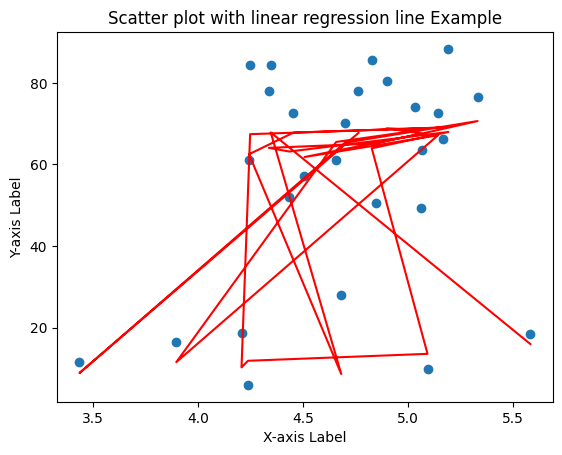

In [74]:

# Plot the data and the model's predictions
plt.scatter(X_test["eyemovement_rate"],y_test, label='Data')#, c = X_test["group"])
plt.plot( X_test["eyemovement_rate"], reg.predict(X_test),color='r', label='Regression model prediction')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter plot with linear regression line Example')
# Show the plot
plt.show()

In [70]:
df = pd.read_csv("./datasets/data_eye_speech.csv")

x = df["eyemovement_rate"].values.reshape(-1, 1)
y = df["reading_speed"]

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Make predictions using the model
y_pred = model.predict(x)



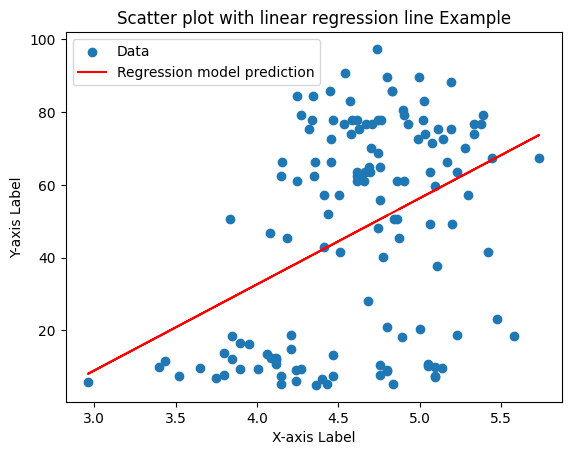

In [71]:

# Plot the data and the model's predictions
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='r', label='Regression model prediction')
plt.legend()
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter plot with linear regression line Example')
# Show the plot
plt.show()

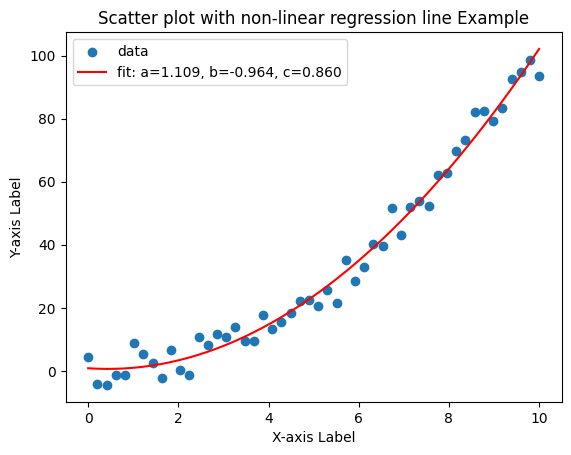

In [64]:


# Generate some example data
x = np.linspace(0, 10, 50)
y = x**2 + np.random.normal(0, 4, 50)

# Define the function to fit (in this case, a polynomial function)
def func(x, a, b, c):
    return a*x**2 + b*x + c

# Fit the function to the data
popt, _ = curve_fit(func, x, y)

# Create the scatter plot
plt.scatter(x, y, label='data')

# Plot the fitted function
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter plot with non-linear regression line Example')
# Show the plot
plt.show()
